# Interpolacijski polinomi


Neka je zadana $n+1$ točka

$$
T_i=(x_i,y_i), \quad i=0,1,\ldots,n,\quad x_i\neq x_j.
$$

## Standardna baza

Kroz zadane točke prolazi _interpolacijski polinom_ $p_n(x)$. Koeficijenti polinoma zadovoljavaju 
sustav linearnih jednadžbi $p_n(x_i)=y_i$, $i=0,\ldots,n$, odnosno

$$
\begin{bmatrix} 
1 & x_0 & x_0^2 & x_0^3 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^n \\
\vdots & & & & \vdots \\
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}a_0\\ a_1 \\ \vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}
$$

Matrica sustava $A$ se zove _Vandermonde-ova matrica_. Njena determinanta dana je formulom

$$ 
\mathop{\mathrm{det}}(A)= \prod_{0\leq j<i\leq n}(x_i-x_j).
$$

Kako su sve apscise različite ($x_i\neq x_j$ za $i\neq j$), vrijedi $\mathop{\mathrm{det}}(A)\neq 0$ pa je matrica $A$ regularna i zadani sustav ima jedinstveno rješenje - dakle, 

> interpolacijski polinom je _jedinstven_.


In [1]:
using Polynomials
using Plots

In [2]:
# Generirajmo slučajne točke
using Random
Random.seed!(123)
n=6
x=rand(n)
y=rand(n)
a=minimum(x)
b=maximum(x)

0.940515000715187

In [3]:
# Ova datoteka omogućuje manipulaciju s Vandermondeovim matricama
include("Vandermonde.jl")

Matrix (generic function with 1 method)

In [4]:
A=Vandermonde(x)

6×6 Vandermonde{Float64}:
 1.0  0.768448  0.590512   0.453777   0.348704    0.267961  
 1.0  0.940515  0.884568   0.83195    0.782461    0.735917  
 1.0  0.673959  0.45422    0.306126   0.206316    0.139049  
 1.0  0.395453  0.156383   0.0618422  0.0244557   0.00967108
 1.0  0.313244  0.0981218  0.0307361  0.00962788  0.00301588
 1.0  0.662555  0.438979   0.290848   0.192702    0.127676  

In [5]:
c=A\y

6-element Array{Float64,1}:
    461.08649192279745
  -4416.860656642327  
  16180.75751474636   
 -28352.751446521273  
  23866.644576553008  
  -7754.352137939532  

In [6]:
p=Poly(c)

Poly(461.08649192279745 - 4416.860656642327*x + 16180.75751474636*x^2 - 28352.751446521273*x^3 + 23866.644576553008*x^4 - 7754.352137939532*x^5)

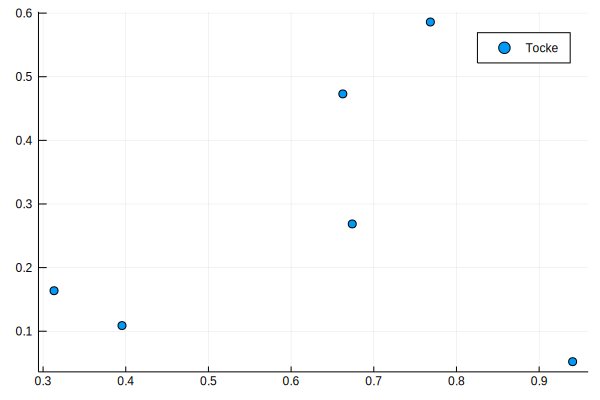

In [7]:
# Točke polinoma
scatter(x,y,label="Tocke")

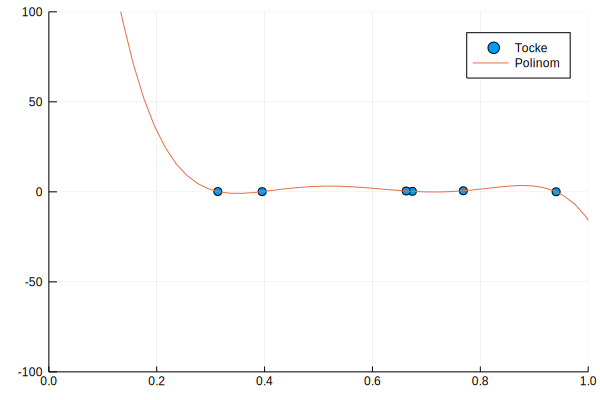

In [8]:
# Nacrtajmo polinom 
plot!(p,label=["Polinom"],xlims=(0,1),ylims=(-100,100))

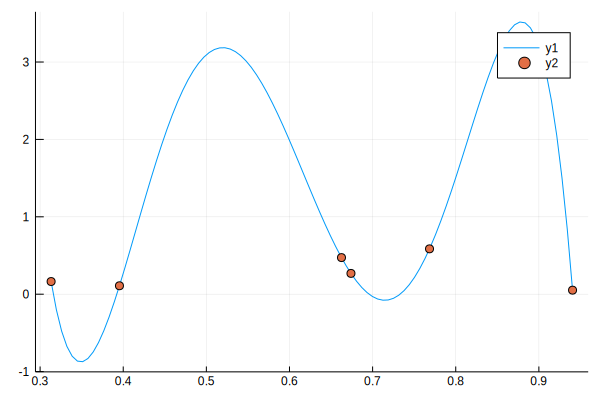

In [9]:
# Nacrtajmo polinom s našom funkcijom
xx=range(a,stop=b,length=100)
pS=polyval(p,xx)
plot(xx,pS)
scatter!(x,y)

In [10]:
# Vandermondeova matrica ima veliku kondiciju
using LinearAlgebra
cond(A)

861893.32989625

Za rješavanje zadanog sustava standardnim putem potrebno je $O(n^3)$ računskih operacija, no postoje metode kojima se Vandermondeovi sustavi mogu riješiti s $O(n^2)$ operacija.

Za izvrednjavanje polinoma u nekoj točki potrebno je $2n$ operacija (Hornerova shema).

Vandermondeova matrice uglavnom imaju veliku kondiciju pa ovaj način računanja koeficijenata polinoma može biti nestabilan.
Stoga se koriste i druge metode za računanje i izvredjavanje interpolacijskih polinoma.

## Lagrangeov interpolacijski polinom

Definirajmo $n+1$ polinom stupnja $n$:

$$
L_j(x)=\prod_{\displaystyle {i=0}\atop {\displaystyle i\neq j}}^n \frac{x-x_i}{x_j-x_i}.
$$

Vrijedi 

$$
L_j(x_i)=\begin{cases}0, \quad i\neq j \\ 1,\quad i=j \end{cases}
$$

pa je 

$$
p_n(x)=y_0\, L_0(x)+y_1 \, L_1(x)+\cdots + y_n\,  L_n(x).
$$

Za računanje nazivnika polinoma prvi put je potrebno $O(n^2)$ operacija, ali se potom vrijednost 
$p_n(x)$ računa s $O(n)$ operacija (_objasnite kako!_). 

Navodimo implementaciju algoritma koja nije optimalno brza.

In [11]:
L(t)=sum(y.*[prod(t .-x[[1:j-1;j+1:end]])/prod(x[j].-x[[1:j-1;j+1:end]]) 
        for j=1:n])

L (generic function with 1 method)

In [12]:
pL=Array{Float64}(undef,length(xx))
for i=1:length(xx)
    pL[i]=L(xx[i])
end

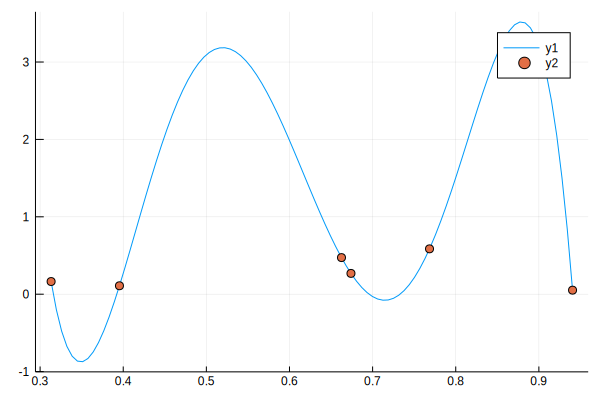

In [13]:
plot(xx,pL)
scatter!(x,y)

In [14]:
norm(pS-pL,Inf)

3.0824232055692846e-11

In [15]:
norm(abs.((pS-pL)./pL),Inf)

3.862793521245479e-10

## Newtonov interpolacijski polinom

Kod ovog polinoma koristi se baza

$$
1, x-x_0, (x-x_0)(x-x_1), (x-x_0)(x-x_1)(x-x_2),\ldots,(x-x_0)(x-x_1)\cdots (x-x_{n-1})
$$

pa je interpolacijski polinom dan s

$$
p_n(x)=c_0 + c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\cdots +c_n(x-x_0)(x-x_1)\cdots (x-x_{n-1}).
$$

Koeficijenti interpolacijskog polinoma su rješenje _trokutastog_ sustava jednadžbi $Lc=y$,

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 \\
1 & x_1-x_0 & 0 & 0 & \cdots & 0 \\
1 & x_2-x_0 & (x_2-x_0)(x_2-x_1) & 0 & \cdots & 0 \\
\vdots & & & & \vdots \\
1 & x_n-x_0 & (x_n-x_0)(x_n-x_1) & (x_n-x_0)(x_n-x_1)(x_n-x_2) & \cdots & (x_n-x_0)\cdots (x_n-x_{n-1}) \\
\end{bmatrix}
\begin{bmatrix}c_0\\ c_1 \\ c_2 \\\vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}.
$$

Za formiranje donje trokutaste matrice $L$ potrebno je $O(n^2)$ operacija. Za računanje koeficijenata $c_0,\ldots,c_n$ potrebno je $O(n^2)$ operacija (rješavanje donje trokutastog sustava) i to rješenje je _stabilno_.

Za računanje $p_n(x)$ koristi se postupak koji je vrlo sličan Hornerovoj shemi. 

In [16]:
# Računanje koeficijenata c
function mynewton(x,y)
    n=length(x)
    L=zeros(n,n)
    L[:,1]=ones(n)
    for i=2:n
        for j=2:i
            L[i,j]=prod([x[i]-x[k] for k=1:j-1])
        end
    end
    c=L\y
end  

mynewton (generic function with 1 method)

In [17]:
c=mynewton(x,y)

6-element Array{Float64,1}:
     0.5860221243068029
    -3.1027910704660844
   -24.241513560242726 
   -58.174753424508765 
  -106.85347267240657  
 -7754.3521378646965   

In [18]:
# Računanje vrijednosti Newtonovog polinoma zadanog s točkama x i 
# koeficijentima c u točki t 
function evalnewton(c,x,t::Number)
    p=c[end]
    for i=length(c)-1:-1:1
        p=p*(t-x[i])+c[i]
    end
    p
end

evalnewton (generic function with 1 method)

In [19]:
pN=Array{Float64}(undef,length(xx))
for i=1:length(xx)
    pN[i]=evalnewton(c,x,xx[i])
end

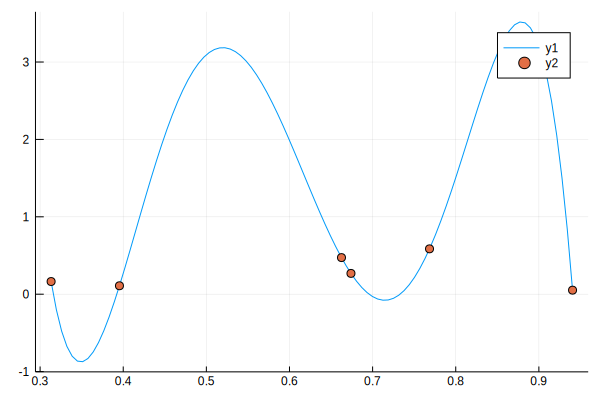

In [20]:
plot(xx,pN)
scatter!(x,y)

In [21]:
norm(abs.((pS-pN)./pN),Inf)

3.862626068777873e-10

In [22]:
norm(abs.((pL-pN)./pN),Inf)

1.6745246754141728e-14

Vidimo da su `pN` i `pL` bliže jedan drugome nego `pS` pa zaključujemo da su zaista točniji.